# Answering the Science Question

This notebook serves to answer the scientific question underlying the design of the Guft of Mexico Current regional model.

The science question for this model is: **How do winds affect ocean temperature in the California Current?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = '/Users/mike/Documents/SJSU/CS_185C/Project'

Then, re-create the model grid

In [3]:
delX = 1/16
delY = 1/16
xgOrigin = -100
ygOrigin = 16
n_rows = 320 #(35 - 15) * 16
n_cols = 400 #(100 - 75) * 16

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## Plot a model field at one timestep
To assess the temperature differences spatially, I'll plot the differences between the model results with and without wind. I'll choose one field near the end of my simulation:

In [4]:
# read in the grid with the wind
grid_wind = np.fromfile(os.path.join(project_dir,'run','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000056736.data'), '>f4')
grid_wind = grid_wind.reshape((2,n_rows,n_cols))

# read in the grid without the wind
grid_no_wind = np.fromfile(os.path.join(project_dir,'run_no_wind','diags',
                                     'TS_surf_daily_mean',
                                     'TS_surf_daily_mean.0000056736.data'), '>f4')
grid_no_wind = grid_no_wind.reshape((2,n_rows,n_cols))

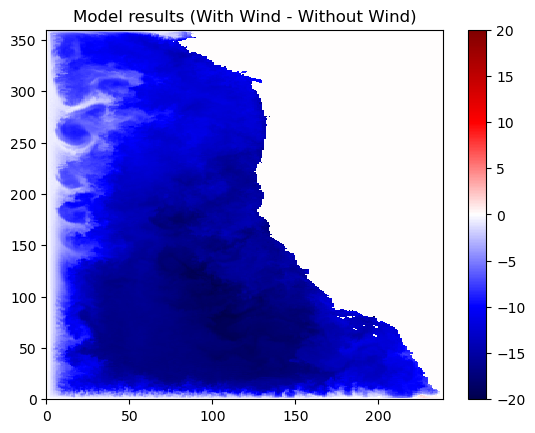

In [5]:
# plot the differences
C = plt.pcolormesh(grid_wind[0,:,:-1]-grid_no_wind[0,:,:-1],
                   cmap='seismic',vmin=-20, vmax=20)
plt.colorbar(C)
plt.title('Model results (With Wind - Without Wind)')
plt.show()

Wow! The model temperature field is nearly 20 degrees hotter without the wind! This reflects the role of the wind in cooling the ocean surface. The only places that we see similar values is on the boundary of the domain. This makes sense because we are prescribing values at the boundaries of the model.

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [1]:
row = 320
col = 400

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [7]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(2017,1,15) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [8]:
timestep_dates = []
theta_wind_values = []
theta_no_wind_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir,'run_no_wind','diags','TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid with the wind
        grid_wind = np.fromfile(os.path.join(project_dir,'run','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_wind = grid_wind.reshape((2,n_rows,n_cols))
        
        # read in the grid without the wind
        grid_no_wind = np.fromfile(os.path.join(project_dir,'run_no_wind','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid_no_wind = grid_no_wind.reshape((2,n_rows,n_cols))

        theta_wind_values.append(grid_wind[0,row,col])
        theta_no_wind_values.append(grid_no_wind[0,row,col])

Finally, I'll plot the timeseries to see the comparison:

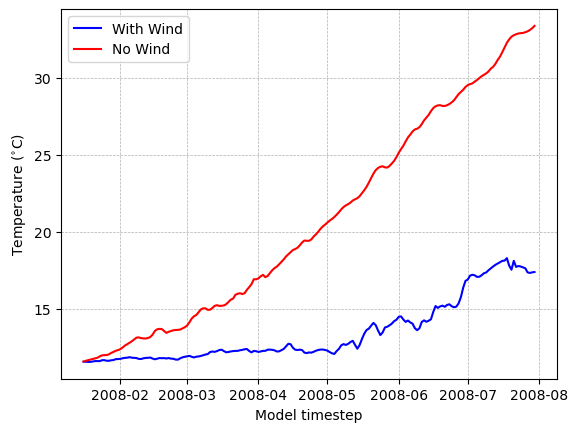

In [9]:
plt.plot(timestep_dates, theta_wind_values,'b-',label='With Wind')
plt.plot(timestep_dates, theta_no_wind_values,'r-',label='No Wind')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Model timestep')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

As with my spatial plot, I can see the effect of the wind over time. Without the wind, there is limited upwelling and mixing at the ocean surface. Without these processes, the surface of the ocean continues to heat up throughout the model run, topping about 32 degrees - that's about what the temperature of the water is in Florida!